In [1]:
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from scipy.stats import ttest_1samp
%matplotlib inline

if '..' not in sys.path:
    sys.path.append('..')
import make_bayes_submission
from make_submission import sigmoid, logit

In [2]:
train_flat = pd.read_csv('../../_data/train_flat.csv', index_col=0)
train_flat[:3]

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
image_name,,,,,,,,,,,,,,,,,
train_0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
train_1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
train_2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [156]:
sample_submission = pd.read_csv('../../_data/sample_submission_v2.csv', index_col=0)
sample_submission[:3]

,tags
image_name,
test_0,primary clear agriculture road water
test_1,primary clear agriculture road water
test_2,primary clear agriculture road water


In [3]:
valid_pred = pd.read_hdf('../../_data/20170720-005737-b6-albu-0.93359-eval.h5').loc[train_flat.index]
valid_pred[:3]

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
image_name,,,,,,,,,,,,,,,,,
train_0,0.003930,0.004211,0.002263,0.001794,0.002070,0.591027,0.006670,0.001795,0.002431,0.002176,0.683836,0.002359,0.997151,0.002328,0.002150,0.001753,0.003885
train_1,0.818843,0.005387,0.014422,0.001886,0.001836,0.997251,0.003316,0.002329,0.455737,0.028945,0.002248,0.002191,0.997231,0.500173,0.004191,0.016922,0.818798
train_2,0.003150,0.003586,0.002302,0.001734,0.001651,0.997664,0.004536,0.001653,0.001856,0.002268,0.001843,0.002075,0.997267,0.002243,0.002193,0.002039,0.002790


In [55]:
valid_pred_2 = pd.read_hdf('../../_data/20170718-234554-b5-albu-eval.h5').loc[train_flat.index]
valid_pred_2[:3]

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
image_name,,,,,,,,,,,,,,,,,
train_0,0.004018,0.002505,0.002335,0.002023,0.001570,0.564935,0.004454,0.001158,0.002751,0.002372,0.683979,0.002067,0.997527,0.002525,0.001848,0.001840,0.003917
train_1,0.817122,0.003267,0.016906,0.001994,0.001630,0.997239,0.003767,0.001254,0.460328,0.032931,0.002022,0.002043,0.997559,0.525844,0.003418,0.016891,0.826382
train_2,0.003122,0.002086,0.002283,0.001856,0.001547,0.997508,0.004618,0.001149,0.002176,0.002374,0.001877,0.001882,0.997805,0.002592,0.001828,0.001718,0.003053


In [54]:
valid_pred_3 = pd.read_hdf('../../_data/train_mean2_01_09_0.933540_uncalibrated.h5').loc[train_flat.index]
valid_pred_3[:3]

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
image_name,,,,,,,,,,,,,,,,,
train_0,0.003113,0.000162,0.000521,0.000485,0.000340,0.420503,0.000231,0.000091,0.001288,0.001112,0.579858,0.000343,0.999621,0.001048,0.000420,0.000146,0.002709
train_1,0.789577,0.000953,0.019854,0.000415,0.000505,0.998904,0.000171,0.000254,0.298429,0.033271,0.000574,0.000375,0.999673,0.354220,0.002517,0.028999,0.770127
train_2,0.002829,0.000195,0.000495,0.000262,0.000376,0.999148,0.000208,0.000224,0.000850,0.001200,0.000485,0.000307,0.999714,0.000747,0.000391,0.000179,0.001632


In [65]:
valid_pred_4 = pd.read_hdf('../../_data/20170720-230454-b6-0.93359-eval.h5').loc[train_flat.index]
valid_pred_4[:3]

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
image_name,,,,,,,,,,,,,,,,,
train_0,0.001607,0.000020,0.000129,0.000260,0.000047,0.783056,0.000066,0.000019,0.001060,0.000264,0.845964,0.000842,0.999914,0.000517,0.000069,0.000055,0.002081
train_1,0.906032,0.001333,0.006105,0.000215,0.000233,0.999280,0.000011,0.000175,0.736821,0.021277,0.000135,0.000616,0.999910,0.762156,0.001573,0.006703,0.904305
train_2,0.000343,0.000002,0.000013,0.000081,0.000016,0.999854,0.000006,0.000002,0.000162,0.000038,0.000035,0.000094,0.999987,0.000087,0.000012,0.000004,0.000215


In [83]:
valid_pred_5 = pd.read_hdf('../../_data/train_mean3_0.933338_uncalibrated.h5').loc[train_flat.index]
valid_pred_5[:3]

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
image_name,,,,,,,,,,,,,,,,,
train_0,0.005478,0.007004,0.003685,0.002817,0.003418,0.463008,0.011074,0.002979,0.003345,0.003450,0.575751,0.003370,0.995309,0.003536,0.003538,0.002884,0.005087
train_1,0.760717,0.008090,0.019966,0.003001,0.002905,0.995899,0.005518,0.003765,0.268348,0.034056,0.003656,0.003242,0.995445,0.325517,0.005937,0.023736,0.761794
train_2,0.005020,0.005975,0.003828,0.002836,0.002740,0.996203,0.007556,0.002753,0.002985,0.003755,0.003048,0.003396,0.995453,0.003681,0.003647,0.003395,0.004506


In [158]:
valid_pred_6 = pd.read_hdf('../../_data/20170720-232049-b7-albu-0.93374-eval.h5').loc[train_flat.index]
test_pred_6 = pd.read_hdf('../../_data/20170720-232049-b7-albu-0.93374-test.h5').loc[sample_submission.index]
valid_pred_6[:3]

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
image_name,,,,,,,,,,,,,,,,,
train_0,0.002963,0.001474,0.000997,0.000863,0.000838,0.572981,0.002333,0.000639,0.001613,0.001248,0.687477,0.001129,0.998874,0.001342,0.000903,0.000655,0.002938
train_1,0.832720,0.002540,0.014506,0.000850,0.000874,0.998447,0.001177,0.000931,0.468102,0.028495,0.001016,0.001049,0.998922,0.512371,0.002825,0.019032,0.823038
train_2,0.002260,0.001274,0.000968,0.000703,0.000705,0.998847,0.001597,0.000641,0.000994,0.001245,0.000816,0.000836,0.998971,0.001067,0.000890,0.000752,0.001634


In [160]:
valid_pred_7 = pd.read_hdf('../../_data/train_mean3_0.933493_uncalibrated.h5').loc[train_flat.index]
test_pred_7 = pd.read_hdf('../../_data/test_mean3_0.933493_uncalibrated.h5').loc[sample_submission.index]
valid_pred_7[:3]

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
image_name,,,,,,,,,,,,,,,,,
train_0,0.004879,0.003779,0.002665,0.002121,0.002582,0.451819,0.006361,0.002168,0.002718,0.002693,0.575163,0.002152,0.996973,0.002847,0.002302,0.002034,0.004316
train_1,0.784487,0.004635,0.019762,0.002113,0.002110,0.997018,0.003775,0.002555,0.277725,0.035275,0.002609,0.002202,0.997030,0.355802,0.004173,0.027381,0.770486
train_2,0.004401,0.003441,0.002696,0.002003,0.002313,0.997293,0.005412,0.002142,0.002374,0.002891,0.002398,0.002150,0.997139,0.002629,0.002225,0.002380,0.003495


In [211]:
valid_pred_8 = pd.read_hdf('../../_data/20170721-010132-b8-albu-0.93362-eval.h5').loc[train_flat.index]
test_pred_8 = pd.read_hdf('../../_data/20170721-010132-b8-albu-0.93362-test.h5').loc[sample_submission.index]
valid_pred_8[:3]

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
image_name,,,,,,,,,,,,,,,,,
train_0,0.002511,0.000106,0.000364,0.000395,0.000223,0.565524,0.000165,0.000062,0.001197,0.000773,0.686300,0.000542,0.999738,0.000836,0.00028,0.000110,0.002458
train_1,0.836159,0.001105,0.014354,0.000335,0.000396,0.999055,0.000107,0.000222,0.473786,0.028474,0.000399,0.000471,0.999768,0.517395,0.00214,0.020080,0.823798
train_2,0.001835,0.000118,0.000302,0.000190,0.000232,0.999431,0.000127,0.000135,0.000575,0.000736,0.000305,0.000222,0.999823,0.000483,0.00024,0.000109,0.001065


In [4]:
def f2_score(y_true, y_pred, eps=1e-7) -> float:
    # same as fbeta_score(y_true, y_pred, beta=2, average='samples')
    # but faster
    if isinstance(y_true, pd.DataFrame):
        y_true = y_true.as_matrix()
    if isinstance(y_pred, pd.DataFrame):
        y_pred = y_pred.as_matrix()
    tp = (y_true * y_pred).sum(axis=1)
    r = tp / y_true.sum(axis=1)
    p = tp / (y_pred.sum(axis=1) + eps)
    beta2 = 4
    f2 = (1 + beta2) * p * r / (beta2 * p + r + eps)
    return f2.mean()

In [5]:
threshold = 0.2
original_score = f2_score(train_flat, valid_pred > threshold)
original_score

0.93359010922228391

In [60]:
f2_score(train_flat, valid_pred_3 > 0.2)

0.93354022237067436

In [66]:
f2_score(train_flat, valid_pred_4 > 0.2)

0.93359446493753029

In [140]:
f2_score(train_flat, (0.5 * valid_pred_4 + 0.5 * valid_pred_3) > 0.2)

0.93360830126324112

In [85]:
f2_score(train_flat, valid_pred_5 > 0.2)

0.93333823002426741

In [139]:
f2_score(train_flat, (0.5 * valid_pred_4 + 0.5 * valid_pred_5) > 0.2)

0.93360806943640218

In [93]:
f2_score(train_flat, valid_pred_6 > 0.2)

0.93373588709201194

In [134]:
f2_score(train_flat, sigmoid(logit(valid_pred_6) - 0.2) > 0.2)

0.93379706280631225

In [138]:
f2_score(train_flat, valid_pred_7 > 0.2)

0.9334928304822665

In [142]:
f2_score(train_flat, 0.5 * (valid_pred_6 + valid_pred_7) > 0.2)

0.93360818030809334

In [175]:
f2_score(train_flat, valid_pred_8 > 0.2)

0.93362194982713365

In [176]:
for th in np.linspace(0.15, 0.35, 20):
    score = f2_score(train_flat, valid_pred_8 > th)
    if score > original_score:
        print('{:.4f} {:.7f}'.format(th, score - original_score))

0.2026 0.0000599
0.2132 0.0000145
0.2237 0.0000002
0.2342 0.0000099
0.2447 0.0000292
0.2553 0.0000474
0.2658 0.0000658
0.2763 0.0001121
0.2868 0.0001716
0.2974 0.0000907
0.3079 0.0001091
0.3184 0.0001267
0.3289 0.0000696
0.3395 0.0000174


best th 0.281, valid delta -0.000356
best th 0.279, valid delta +0.000566
best th 0.283, valid delta +0.000150
best th 0.283, valid delta -0.000187
best th 0.285, valid delta +0.000452
best th 0.287, valid delta +0.000108
best th 0.281, valid delta +0.000312
best th 0.289, valid delta -0.000563
best th 0.287, valid delta +0.000353
best th 0.283, valid delta -0.000221
Mean delta +0.00006, mean threshold 0.284
T-test: Ttest_1sampResult(statistic=0.51720258933594931, pvalue=0.61748461870953042)


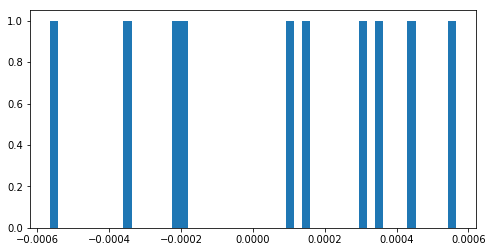

In [177]:
deltas = []
thresholds = []
for train_ids, valid_ids in KFold(n_splits=10, shuffle=True).split(valid_pred_6.index):
    best_score = 0
    best_th = 0.2
    for th in np.linspace(0.15, 0.35, 100):
        score = f2_score(train_flat.iloc[train_ids], valid_pred_8.iloc[train_ids] > th)
        if score > best_score:
            best_score = score
            best_th = th
    delta = (f2_score(train_flat.iloc[valid_ids], valid_pred_8.iloc[valid_ids] > best_th) -
             f2_score(train_flat.iloc[valid_ids], valid_pred_8.iloc[valid_ids] > 0.2))
    deltas.append(delta)
    thresholds.append(best_th)
    print('best th {:.3f}, valid delta {:+.6f}'.format(best_th, delta))
    # print('{:+.5f}'.format(delta))
plt.figure(figsize=(8, 4))
plt.hist(deltas, bins=50);
print('Mean delta {:+.5f}, mean threshold {:.3f}'.format(np.mean(deltas), np.mean(thresholds)))
print('T-test: {}'.format(ttest_1samp(deltas, 0)))

In [181]:
def check_weather(valid, a, b, threshold=0.2):
    deltas = []
    scores = []
    for _ in range(100):
        for train_ids, valid_ids in KFold(n_splits=10, shuffle=True).split(valid.index):
            hack = valid.iloc[valid_ids].copy()
            hack[hack['cloudy'] > a] *= b
            score = f2_score(train_flat.iloc[valid_ids], hack > threshold)
            delta = (score - f2_score(train_flat.iloc[valid_ids], valid.iloc[valid_ids] > threshold))
            deltas.append(delta)
            scores.append(score)
            # print('{:+.5f}'.format(delta))
    plt.figure(figsize=(8, 4))
    plt.hist(deltas, bins=50);
    print('Mean delta {:+.6f}, mean score {:.6f}'.format(np.mean(deltas), np.mean(scores)))
    print('T-test: {}'.format(ttest_1samp(deltas, 0)))

Mean delta +0.000043, mean score 0.933692
T-test: Ttest_1sampResult(statistic=4.5574262396099874, pvalue=5.8188039064577168e-06)


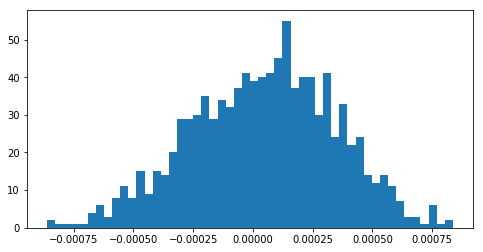

In [182]:
check_weather(0.7 * valid_pred_6 + 0.3 * valid_pred_7, 0.6, 0.6)

Mean delta +0.000113, mean score 0.933735
T-test: Ttest_1sampResult(statistic=14.318775239478926, pvalue=1.947511652350964e-42)


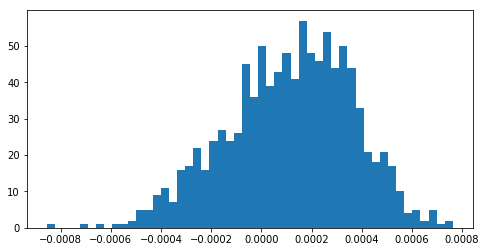

In [183]:
check_weather(valid_pred_8, 0.4, 0.6)

Mean delta +0.000043, mean score 0.933665
T-test: Ttest_1sampResult(statistic=8.1439772138864868, pvalue=1.1334941445601831e-15)


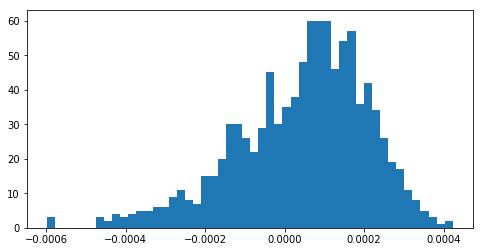

In [186]:
check_weather(valid_pred_8, 0.8, 0.8)

Mean delta +0.000080, mean score 0.933802
T-test: Ttest_1sampResult(statistic=32.676019372638983, pvalue=6.991997977171903e-160)


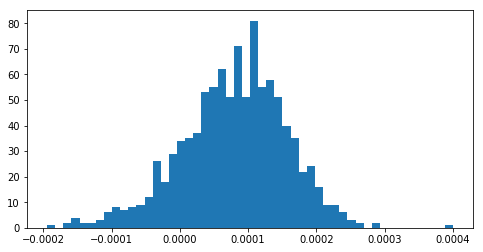

In [198]:
check_weather(valid_pred_8, 0.3, 0.9, threshold=0.29)

In [46]:
base_score = f2_score(train_flat, valid_pred > threshold)
bayes_valid = make_bayes_submission.get_df_prediction(valid_pred, add_hacks=False)
new_score = f2_score(train_flat, bayes_valid)
print('{:.6f}, {:.6f}'.format(new_score, new_score - base_score))
# 0.933706, 0.000116 hacks
# 0.933658, 0.000068 no hacks

0.933658, 0.000068


In [40]:
(train_ids, valid_ids), _ = KFold(n_splits=2, shuffle=True, random_state=42).split(train_flat.index)
base_score = f2_score(train_flat.iloc[train_ids], valid_pred.iloc[train_ids] > threshold)
bayes_valid = make_bayes_submission.get_df_prediction(
    valid_pred.iloc[train_ids], add_hacks=True)
new_score = f2_score(train_flat.iloc[train_ids], bayes_valid)
print('{:.6f}, {:.6f}'.format(new_score, new_score - base_score))
# train
# 0.933590, 0.000054 base
# 0.933624, 0.000087 cloudy + x *= 0.9
# 0.933666, 0.000130 cloudy + x *= 0.9 | multiweather *= 0.9
# 0.933666, 0.000140 cloudy + x *= 0.9 | multiweather *= 0.9 | cloudy + primary *= 0.87
# valid
# 0.933725, 0.000081 base
# 0.933735, 0.000091 cloudy + x *= 0.9 | multiweather *= 0.9 | cloudy + primary *= 0.87

0.933677, 0.000140


In [43]:
base_score = f2_score(train_flat.iloc[valid_ids], valid_pred.iloc[valid_ids] > threshold)
bayes_valid = make_bayes_submission.get_df_prediction(
    valid_pred.iloc[valid_ids], add_hacks=True)
new_score = f2_score(train_flat.iloc[valid_ids], bayes_valid)
print('{:.6f}, {:.6f}'.format(new_score, new_score - base_score))

0.933735, 0.000091


In [55]:
for alpha in [0.05, 0.1, 0.15]:
    new_score = f2_score(
        train_flat,
        make_bayes_submission.get_df_prediction(valid_pred * (1 + alpha)))
    print('alpha={:.2f}, score={:.6f}, delta={:.6f}'.format(alpha, new_score, new_score - original_score))

alpha=0.05, score=0.933632, delta=0.000042
alpha=0.10, score=0.933638, delta=0.000048
alpha=0.15, score=0.933538, delta=-0.000052


In [35]:
for delta in [-0.03, -0.01, 0.01, 0.03]:
    new_score = f2_score(
        train_flat,
        make_bayes_submission.get_df_prediction(sigmoid(logit(valid_pred) + delta)))
    print('delta={:.2f}, score={:.6f}, delta={:.6f}'.format(delta, new_score, new_score - original_score))

delta=-0.05, score=0.933657, delta=0.000066
delta=-0.10, score=0.933619, delta=0.000027
delta=0.05, score=0.933533, delta=-0.000058


In [45]:
new_score = f2_score(train_flat, make_bayes_submission.get_df_prediction(valid_pred, min_p=0.03, max_p=0.5))
print('{:.6f}, {:.6f}'.format(new_score, new_score - original_score))

0.933270, 0.000061


In [122]:
def check_bayes(valid, add_hacks):
    bayes = make_bayes_submission.get_df_prediction(valid, add_hacks=add_hacks)
    deltas = []
    scores = []
    for _ in range(100):
        for train_ids, valid_ids in KFold(n_splits=10, shuffle=True).split(valid.index):
            score = f2_score(train_flat.iloc[valid_ids], bayes.iloc[valid_ids])
            scores.append(score)
            delta = (score - f2_score(train_flat.iloc[valid_ids], valid.iloc[valid_ids] > 0.2))
            deltas.append(delta)
    plt.figure(figsize=(8, 4))
    plt.hist(deltas, bins=50);
    print('Mean delta {:+.6f}, mean score {:.6f}'.format(np.mean(deltas), np.mean(scores)))
    print('T-test: {}'.format(ttest_1samp(deltas, 0)))

Mean delta +0.000068, mean score +0.933658
T-test: Ttest_1sampResult(statistic=8.7292295446403365, pvalue=1.0604579365516302e-17)


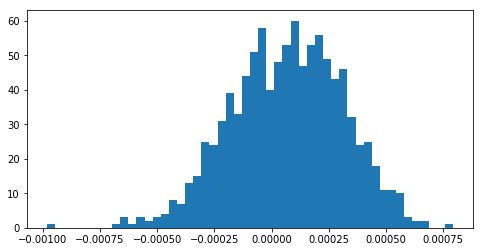

In [120]:
check_bayes(valid_pred, add_hacks=False)

Mean delta +0.000116, mean score +0.933706
T-test: Ttest_1sampResult(statistic=13.677891452416464, pvalue=3.6556560861735683e-39)


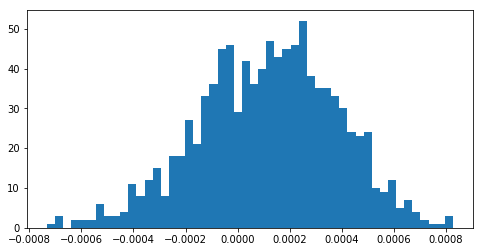

In [121]:
check_bayes(valid_pred, add_hacks=True)

Mean delta +0.000142
T-test: Ttest_1sampResult(statistic=13.281556082660087, pvalue=3.4413562151125698e-37)


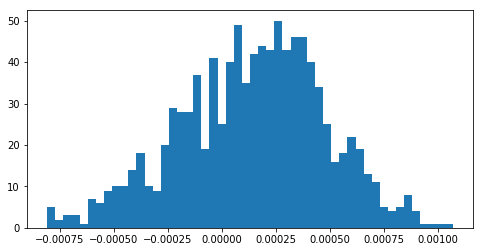

In [76]:
check_bayes(valid_pred_2, add_hacks=False)

Mean delta +0.000147
T-test: Ttest_1sampResult(statistic=12.342327469420757, pvalue=1.1259740752972426e-32)


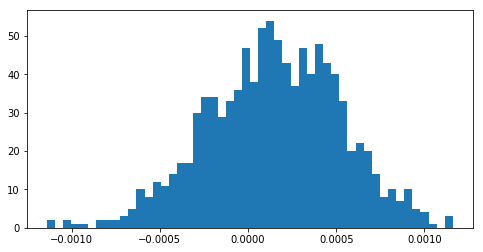

In [77]:
check_bayes(valid_pred_2, add_hacks=True)

Mean delta -0.000244
T-test: Ttest_1sampResult(statistic=-16.28179586542425, pvalue=4.822686489150312e-53)


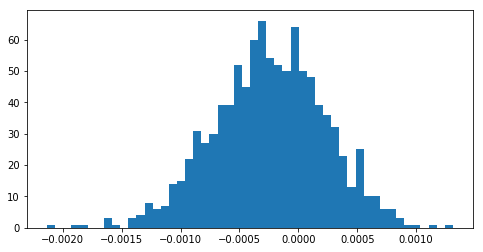

In [78]:
check_bayes(valid_pred_3, add_hacks=False)

Mean delta -0.000374
T-test: Ttest_1sampResult(statistic=-20.243030252549111, pvalue=1.2731965408793187e-76)


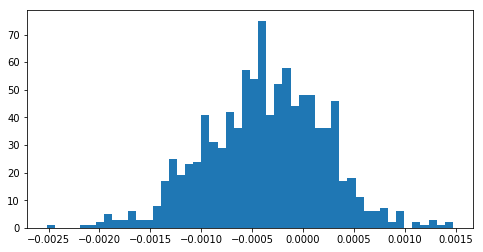

In [79]:
check_bayes(valid_pred_3, add_hacks=True)

Mean delta +0.000086
T-test: Ttest_1sampResult(statistic=18.103065197617955, pvalue=1.4418766348971896e-63)


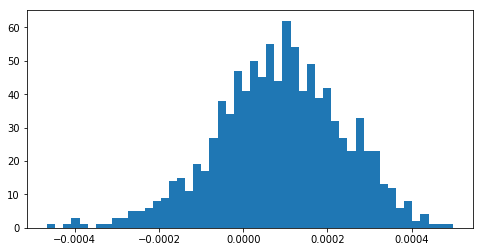

In [80]:
check_bayes(valid_pred_4, add_hacks=False)

Mean delta +0.000086
T-test: Ttest_1sampResult(statistic=15.995696171463731, pvalue=1.9049774633665546e-51)


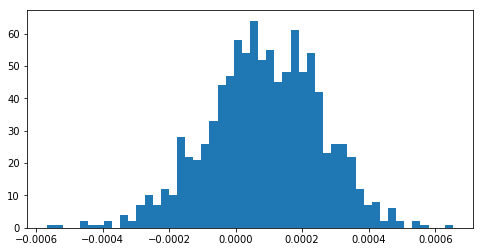

In [81]:
check_bayes(valid_pred_4, add_hacks=True)

Mean delta -0.000169
T-test: Ttest_1sampResult(statistic=-11.404233465654524, pvalue=2.0870985113729547e-28)


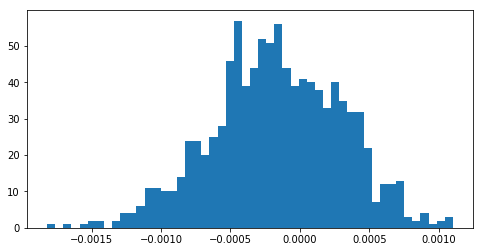

In [87]:
check_bayes(valid_pred_5, add_hacks=False)

Mean delta -0.000227
T-test: Ttest_1sampResult(statistic=-13.181063259038456, pvalue=1.0736259120384286e-36)


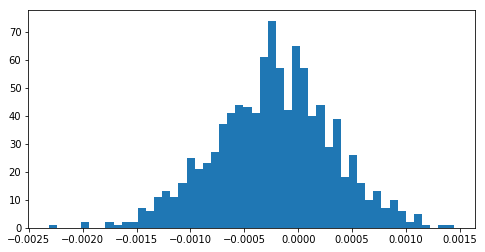

In [88]:
check_bayes(valid_pred_5, add_hacks=True)

Mean delta +0.000042
T-test: Ttest_1sampResult(statistic=5.050899427187507, pvalue=5.2256112597172847e-07)


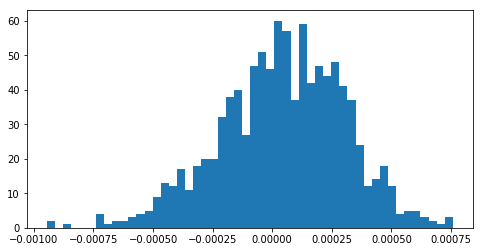

In [90]:
check_bayes(0.5 * valid_pred_4 + 0.5 * valid_pred_5, add_hacks=True)

Mean delta +0.000037
T-test: Ttest_1sampResult(statistic=5.4804007001706889, pvalue=5.372842399304969e-08)


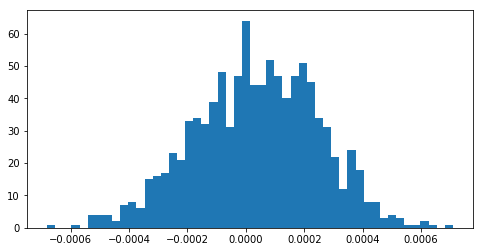

In [91]:
check_bayes(0.5 * valid_pred_4 + 0.5 * valid_pred_5, add_hacks=False)

Mean delta +0.000129, mean score 0.933865
T-test: Ttest_1sampResult(statistic=16.831938546577224, pvalue=3.6994356338562241e-56)


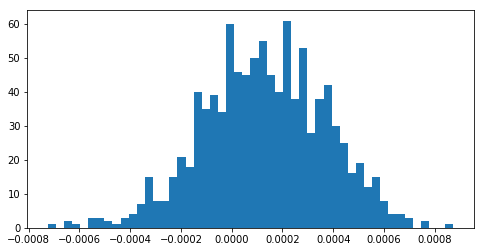

In [123]:
check_bayes(valid_pred_6, add_hacks=False)

Mean delta +0.000066, mean score 0.933802
T-test: Ttest_1sampResult(statistic=6.7212430020446732, pvalue=3.0237809957733442e-11)


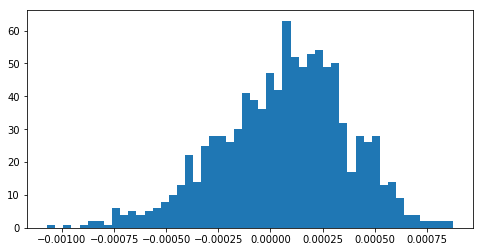

In [124]:
check_bayes(valid_pred_6, add_hacks=True)

Mean delta +0.000120, mean score 0.933917
T-test: Ttest_1sampResult(statistic=14.79447581615702, pvalue=6.265094528634159e-45)


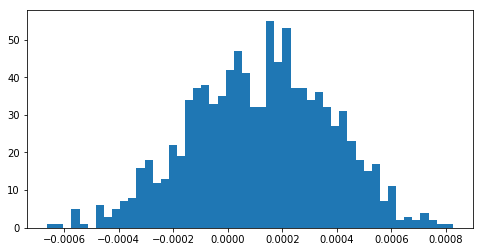

In [127]:
check_bayes(sigmoid(logit(valid_pred_6) - 0.2), add_hacks=False)

Mean delta +0.000040, mean score 0.933791
T-test: Ttest_1sampResult(statistic=4.9146973594311252, pvalue=1.0387449355800475e-06)


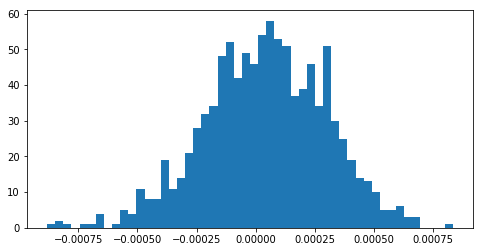

In [129]:
check_bayes(sigmoid(logit(valid_pred_6) - 0.1), add_hacks=False)

Mean delta +0.000258, mean score 0.933907
T-test: Ttest_1sampResult(statistic=30.075789389920125, pvalue=5.051045070133319e-142)


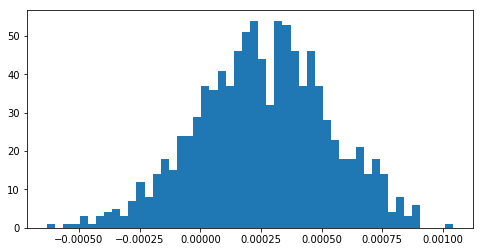

In [151]:
check_bayes((0.7 * valid_pred_6 + 0.3 * valid_pred_7), add_hacks=False)

Mean delta +0.000325, mean score 0.933887
T-test: Ttest_1sampResult(statistic=36.036042524086554, pvalue=7.1178065678254613e-183)


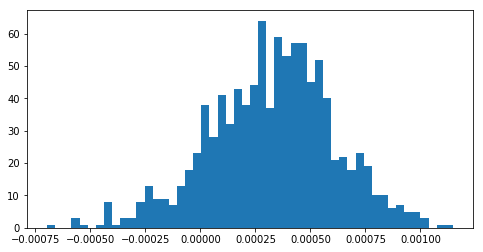

In [152]:
check_bayes((0.6 * valid_pred_6 + 0.4 * valid_pred_7), add_hacks=False)

Mean delta +0.000229, mean score 0.933863
T-test: Ttest_1sampResult(statistic=26.759100498036595, pvalue=2.2536550759139873e-119)


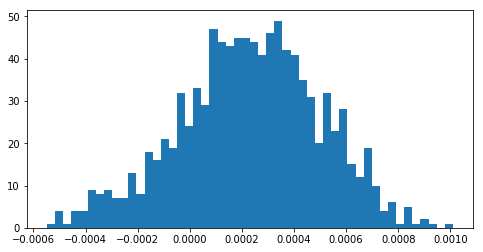

In [155]:
check_bayes(sigmoid(logit(0.7 * valid_pred_6 + 0.3 * valid_pred_7) + 0.05), add_hacks=False)

Mean delta +0.000196, mean score 0.933805
T-test: Ttest_1sampResult(statistic=16.258816989914791, pvalue=6.4882446062694241e-53)


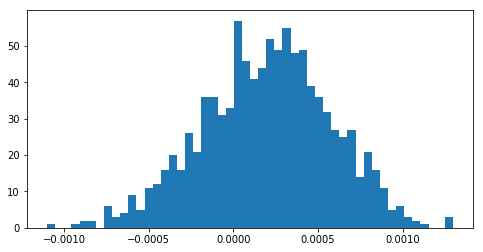

In [144]:
check_bayes(0.5 * (valid_pred_6 + valid_pred_7), add_hacks=True)

Mean delta +0.000148, mean score 0.933780
T-test: Ttest_1sampResult(statistic=21.977356784842627, pvalue=1.2253843771265775e-87)


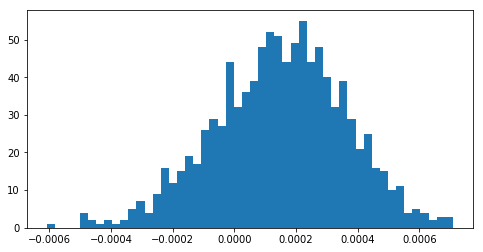

In [195]:
check_bayes(sigmoid(logit(valid_pred_8) - 0.3), add_hacks=False)

Mean delta +0.000120, mean score 0.933752
T-test: Ttest_1sampResult(statistic=16.024109885792779, pvalue=1.3245258487565076e-51)


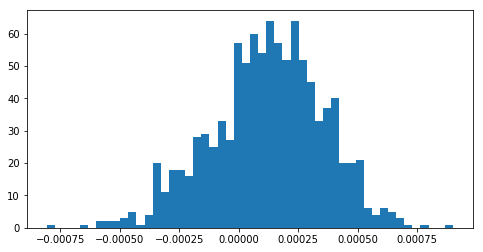

In [196]:
check_bayes(sigmoid(logit(valid_pred_8) - 0.3), add_hacks=True)

Mean delta +0.000112
T-test: Ttest_1sampResult(statistic=3.3712499186743745, pvalue=0.0010683301814363732)


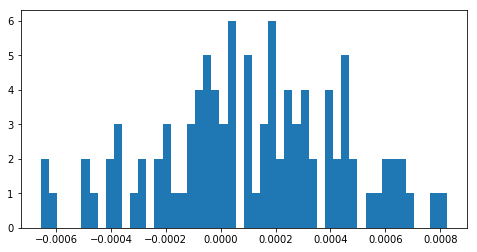

In [34]:
deltas = []
for _ in range(10):
    for train_ids, valid_ids in KFold(n_splits=10, shuffle=True).split(valid_pred.index):
        hack = valid_pred.iloc[valid_ids].copy()
        hack[hack['cloudy'] > .7] *= .7
        bayes = make_bayes_submission.get_df_prediction(hack)
        delta = (f2_score(train_flat.iloc[valid_ids], bayes) -
                 f2_score(train_flat.iloc[valid_ids], valid_pred.iloc[valid_ids] > threshold))
        deltas.append(delta)
plt.figure(figsize=(8, 4))
plt.hist(deltas, bins=50);
print('Mean delta {:+.6f}'.format(np.mean(deltas)))
print('T-test: {}'.format(ttest_1samp(deltas, 0)))

In [6]:
bayes_shifted = make_bayes_submission.get_df_prediction(sigmoid(logit(valid_pred) + 0.1))

Mean delta +0.000154
T-test: Ttest_1sampResult(statistic=28.651988829842661, pvalue=2.8791999077179275e-132)


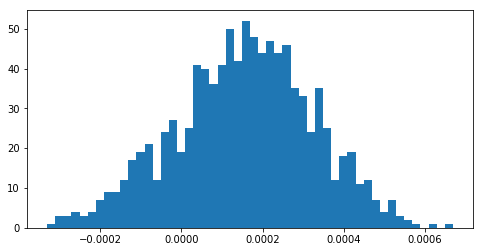

In [10]:
deltas = []
for _ in range(100):
    for train_ids, valid_ids in KFold(n_splits=10, shuffle=True).split(valid_pred.index):
        delta = (f2_score(train_flat.iloc[valid_ids], bayes_shifted.iloc[valid_ids]) -
                 f2_score(train_flat.iloc[valid_ids], valid_pred.iloc[valid_ids] > threshold))
        deltas.append(delta)
plt.figure(figsize=(8, 4))
plt.hist(deltas, bins=50);
print('Mean delta {:+.6f}'.format(np.mean(deltas)))
print('T-test: {}'.format(ttest_1samp(deltas, 0)))

In [119]:
hack = valid_pred.copy()
for cls in hack.columns:
    if cls != 'cloudy':
        hack[cls][hack['cloudy'] > .8] *= .8
bayes_shifted_hack = make_bayes_submission.get_df_prediction(hack)        

Mean delta +0.000139
T-test: Ttest_1sampResult(statistic=17.250611410018571, pvalue=1.4431135265726424e-58)


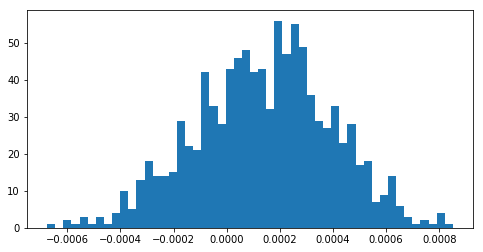

In [120]:
deltas = []
for _ in range(100):
    for train_ids, valid_ids in KFold(n_splits=10, shuffle=True).split(valid_pred.index):
        delta = (f2_score(train_flat.iloc[valid_ids], bayes_shifted_hack.iloc[valid_ids]) -
                 f2_score(train_flat.iloc[valid_ids], valid_pred.iloc[valid_ids] > threshold))
        deltas.append(delta)
plt.figure(figsize=(8, 4))
plt.hist(deltas, bins=50);
print('Mean delta {:+.6f}'.format(np.mean(deltas)))
print('T-test: {}'.format(ttest_1samp(deltas, 0)))

In [212]:
submit = test_pred_8.copy()
submit[submit['cloudy'] > .4] *= .6
submit = submit > 0.2

In [213]:
out_df = pd.DataFrame([
    {'tags': ' '.join(c for c in submit.columns if row[c])
     } for image_name, row in submit.iterrows()],
    index=submit.index)

In [203]:
out_df[:5]

,tags
image_name,
test_0,clear primary
test_1,clear primary
test_2,partly_cloudy primary
test_3,agriculture clear cultivation primary
test_4,cloudy partly_cloudy primary


In [214]:
out_df.to_csv('../../20170721-010132-b8-albu-0.93362-weather0406-test.csv', index_label='image_name')

In [210]:
! head ../../20170721-010132-b8-albu-0.93362-weather0406-test.csv

image_name,tags
test_0,clear primary
test_1,clear primary
test_2,partly_cloudy primary
test_3,agriculture clear cultivation primary
test_4,cloudy partly_cloudy primary
test_5,clear primary
test_6,agriculture clear cultivation habitation partly_cloudy primary water
test_7,agriculture clear habitation primary road
test_8,clear primary
